# Climate Classification with KMeans

### Import the modules

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np

### Get the datasets and line up the cities

In [2]:
table_max = pd.read_csv("datasets/average_max_temp.csv").sort_values(by=["City"]).reset_index(drop=True)
table_min = pd.read_csv("datasets/average_min_temp.csv").sort_values(by=["City"]).reset_index(drop=True)
table_prep = pd.read_csv("datasets/average_precipitation.csv").sort_values(by=["City"]).reset_index(drop=True)

turkey_map = gpd.read_file("datasets/shape/turkey.shp").sort_values(by=["City"])

### Prepare the feature vectors

In [3]:
features = []
for column in table_max.columns[1:-1]:
    features.append(table_max[column])
    
for column in table_min.columns[1:-1]:
    features.append(table_min[column])
    
for column in table_prep.columns[1:-1]:
    features.append(table_prep[column] / 10)
    
train_X = np.column_stack(features)

### Train the model

In [4]:
model = KMeans(n_clusters=7).fit(train_X)

### Plot the result

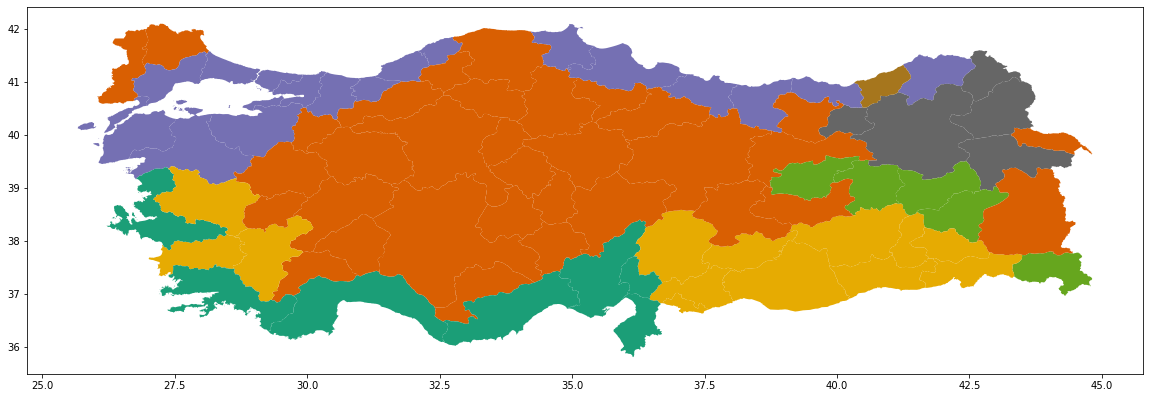

In [5]:
turkey_map["Label"] = model.labels_
turkey_map.plot(column="Label", cmap="Dark2", figsize=(20, 8))

plt.show()